# Task 1
#### Week 1 (Learning Period Synapse)
###### pandas, numpy, matplotlib

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1. Import pandas, numpy and matplotlib

In [2]:
#write code here

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. load the data 
<br> load the titanic dataset in a pandas dataframe <br> (download dataset from https://www.kaggle.com/c/titanic/data and store it in a folder called <b>"syanpse_w1"</b> in the root of your drive) <br>
Note that you have to download the train and test csv files seperately

In [4]:
train_path = "/content/gdrive/MyDrive/syanpse_w1/train.csv"
test_path = "/content/gdrive/MyDrive/syanpse_w1/test.csv"

#write code to load train.csv and test.csv in dataframes
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [5]:
#write code to show first five data entries of both dataframes


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Exploratory Data Analysis
Exploratory data analysis is a very important part of ML as it helps you understand the data you are dealing with <br>
<br>
(we will be working on the train dataframe in this task)

### 3.a. overview of the dataset

 - write code to list the columns in your dataframe (each column on new line as visibility is important)

In [8]:
#write code here
list(train_df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

 - write a function that returns the number of rows and columns in the dataset 

In [9]:
#write code here (print values as well)
print("No. of rows in train dataframe:",len(train_df))
print("No. of columns in train dataframe:",len(train_df.count()))
train_df.shape

No. of rows in train dataframe: 891
No. of columns in train dataframe: 12


(891, 12)

 - use the info() method of pandas dataframe to print the info related to the dataframe

In [10]:
# write code here
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - use the describe() method of pandas dataframe to print the statistical description of the dataset

In [11]:
#write code here
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 - Find all columns that have unique values. (example : the Gender column has 2 unique values Male and Female) <br>

 - if the columns have finite unique values, then add them in a dictionary of lists and print it <br>
<br>
dictionary should look like : <br>
<t>{<br>&nbsp;&nbsp; "Gender" : ["Male", "Female"],<br>&nbsp;&nbsp; "Col2" : ["unique1", "unique2"],<br>&nbsp;&nbsp;&nbsp;&nbsp;.<br>&nbsp;&nbsp;&nbsp;&nbsp;.<br>&nbsp;&nbsp;&nbsp;&nbsp;.<br>}

In [12]:
#write code here
data=[]
print("Column Name","Unique values")
for i in train_df.columns:
  print(i,len(train_df[i].unique()))
  if(len(train_df[i].unique())<5):
    data.append(i)
print("Columns having finite unique values are:",data)
print("No.of columns having finite unique values are:",len(data))

Column Name Unique values
PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4
Columns having finite unique values are: ['Survived', 'Pclass', 'Sex', 'Embarked']
No.of columns having finite unique values are: 4


In [13]:
from collections import OrderedDict
dicts={}
col=[]
unique=[]
ord_list=[]
for i in range(len(data)):
   col.append("Col"+str(i+1))
   ord_list.append(data[i])
   ord_list.append(col[i])
for i in range(10):
    unique.append("unique"+str(i+1))
for i in range(len(data)):
    dicts[data[i]]=list(train_df[data[i]].unique())
    dicts[col[i]]=unique[:len(train_df[data[i]].unique())]
def customsort(dicts,ord_list):
  items = [dicts[k] if k in dicts.keys() else 0 for k in ord_list]
  sorted_dict=OrderedDict()
  for i in range(len(ord_list)):
    sorted_dict[ord_list[i]]=items[i]
  return sorted_dict
sorted_dicti=customsort(dicts,ord_list)
sorted_dicti

OrderedDict([('Survived', [0, 1]),
             ('Col1', ['unique1', 'unique2']),
             ('Pclass', [3, 1, 2]),
             ('Col2', ['unique1', 'unique2', 'unique3']),
             ('Sex', ['male', 'female']),
             ('Col3', ['unique1', 'unique2']),
             ('Embarked', ['S', 'C', 'Q', nan]),
             ('Col4', ['unique1', 'unique2', 'unique3', 'unique4'])])

### 3.b. Visualizing hidden Details

##### Aim is to find relationship between Title and Survival rate
- print the <b>name</b> column of the data<br>
- notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
- extract the title using regular expression (help given below in the code)
- store the title in a new column in the dataframe. Name the column : <b>Title</b>

In [14]:
#write code here (for regex help refer next code cell)
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [15]:
#regex example
import re

name_eg = "Petranec, Miss. Matilda"
title_search = re.search('(\w+)\.', name_eg) #the first argument is a pattern that we are looking for
print("result:", title_search) #this is the result we get after looking for the pattern
if title_search:
  print("pattern found") #pattern found printed if a pattern like above is found
  title = title_search.group(1) #extracting the pattern found by regular expression (title here)
  print("title:", title) 

result: <re.Match object; span=(10, 15), match='Miss.'>
pattern found
title: Miss


In [16]:
#show the new dataframe with "Title" column here
Title=[]
for i in train_df['Name']:
  name_eg = i
  title_search = re.search('(\w+)\.', name_eg) #the first argument is a pattern that we are looking for
  if title_search:
      title = title_search.group(1) #extracting the pattern found by regular expression (title here)
      Title.append(title)


In [17]:
#train_df1=train_df.copy()
train_df['Title']=Title
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


- write code to get unique values from the title column
- use the unique titles to find the number of people who survived (1) and number of people who did not (0) for each title. <b>num_survived/total</b> will give the survival rate for that title
- make a new dataframe called <b>SR_df</b> and add the survival rates corresponding to titles in it<br><br>
you may write a function for the above.<br><br>
expected output : <br>
Mr &nbsp;&nbsp; 0.679392<br>
Capt &nbsp;&nbsp; 0.1245<br>
&nbsp;&nbsp;.<br>
&nbsp;&nbsp;.<br>
&nbsp;&nbsp;.<br>


In [18]:
#write code here
title=train_df['Title'].unique()
title

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [19]:
#show the new dataframe SR_df here
num_survived=[] 
num_unsurvived=[]
total=[]
survival_rate=[]
for i in train_df['Title'].unique():
    total.append(len(train_df[train_df['Title']==i]))
    df=train_df[train_df['Title']==i]
    num_survived.append(len(df[df['Survived']==1]))
    num_unsurvived.append(len(df[df['Survived']==0]))
for i in range(len(train_df['Title'].unique())):
    survival_rate.append(num_survived[i]/total[i])


In [20]:
data=[]
for i in range(len(train_df['Title'].unique())):
  data.append([title[i],survival_rate[i]]) 
SR_df=pd.DataFrame(data,columns=['Title','survival rates'])
SR_df

,Title,survival rates
0,Mr,0.156673
1,Mrs,0.792000
2,Miss,0.697802
3,Master,0.575000
4,Don,0.000000
5,Rev,0.000000
6,Dr,0.428571
7,Mme,1.000000
8,Ms,1.000000
9,Major,0.500000


- use SR_df to plot a bar graph for survival rate vs Title

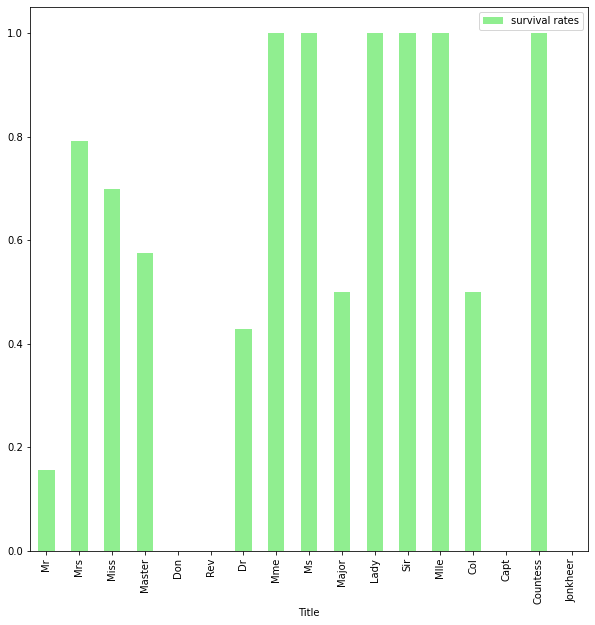

In [21]:
#write code here
SR_df.plot(x = 'Title', y = 'survival rates', kind = 'bar', figsize = (10,10),color='lightgreen')

This brings us to the end of EDA. <br>
You may feel free to do more exploratry analysis.<br>
The aim of this notebook is not to point out every small detail but to give you an overview and guide you

## 4. Data Visualization

- Make a pie chart to show the number of people who survived and number of people who did not
- Make a pie chart to show the number of <b>Males</b> who survived and number of people who did not
- Make a pie chart to show the number of <b>Females</b> who survived and number of people who did not
<br><br>
Note that all three charts must be visible in a single row (look into subplots)

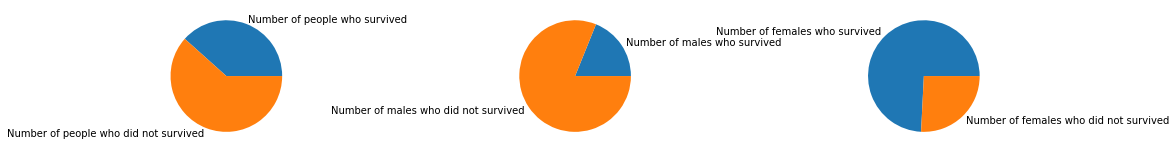

In [22]:
#write code here
survival=['Number of people who survived','Number of people who did not survived']
m_survival=['Number of males who survived','Number of males who did not survived']
f_survival=['Number of females who survived','Number of females who did not survived']
survived=train_df[train_df['Survived']==1]
m_survived=survived[survived['Sex']=='male']
f_survived=survived[survived['Sex']=='female']
unsurvived=train_df[train_df['Survived']==0]
m_unsurvived=unsurvived[unsurvived['Sex']=='male']
f_unsurvived=unsurvived[unsurvived['Sex']=='female']
data=[len(survived),len(unsurvived)]
m_data=[len(m_survived),len(m_unsurvived)]
f_data=[len(f_survived),len(f_unsurvived)]
fig, axes=plt.subplots(1,3,figsize=(15,15))
axes[0].pie(data,labels=survival)
axes[1].pie(m_data,labels=m_survival)
axes[2].pie(f_data,labels=f_survival)
fig.subplots_adjust(wspace=1.5)

- Find if money affected survival rate (fare and Pclass) 
 - Make a bar graph showing Pclass vs survival rate
 - Make a KDE plot (use the sns library) and plot Fare based on the Survival (google away for this one)

In [23]:
pclass=train_df['Pclass'].unique()
pclass

array([3, 1, 2])

In [24]:
#write code here
num_survived=[] 
num_unsurvived=[]
total=[]
survival_rate=[]
for i in train_df['Pclass'].unique():
    total.append(len(train_df[train_df['Pclass']==i]))
    df=train_df[train_df['Pclass']==i]
    num_survived.append(len(df[df['Survived']==1]))
    num_unsurvived.append(len(df[df['Survived']==0]))
for i in range(len(train_df['Pclass'].unique())):
    survival_rate.append(num_survived[i]/total[i])


In [25]:
data=[]
for i in range(len(train_df['Pclass'].unique())):
  data.append([pclass[i],survival_rate[i]]) 
SR_df=pd.DataFrame(data,columns=['Pclass','survival rates'])
SR_df

,Pclass,survival rates
0,3,0.242363
1,1,0.629630
2,2,0.472826


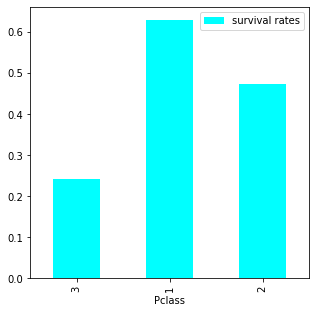

In [26]:
SR_df.plot(x = 'Pclass', y = 'survival rates', kind = 'bar', figsize = (5,5),color='cyan')

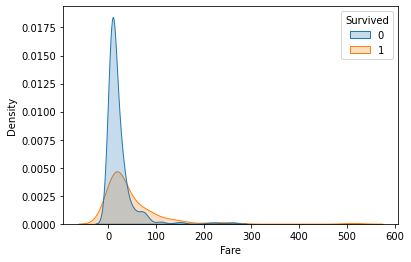

In [27]:
import seaborn as sns
data=[train_df['Survived'],train_df['Fare']]
surv_df=pd.concat(data,axis=1,keys=['Survived','Fare'])
sns.kdeplot(data=surv_df,x="Fare",hue="Survived",shade=True)


## 5. Preprocessing
preprocessing is a very important step before we step into modelling

 - when we added the Title column in the datadframe, we did preprocessing on the existing data to extract relevant information. As we also tried to explore and understand the data using survival rate, we saw it under EDA.

### 5.a. Removing unnecessary columns

 - The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
 - We will also remove the Name column as we have done <b>feature extraction</b> and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [28]:
#write code to remove unnecessary columns from the dataframe here

In [29]:
train_df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,Rev
887,1,1,female,19.0,0,0,30.0000,B42,S,Miss
888,0,3,female,NaN,1,2,23.4500,NaN,S,Miss
889,1,1,male,26.0,0,0,30.0000,C148,C,Mr


### 5.b. Nan analysis

 - write code to find the percentage of Nans in each column and visualize it in a tabular format

In [30]:
#write code here
data=[]
col=list(train_df.columns)
col
for i in range(len(train_df.columns)):
  data.append([col[i],(((train_df[col[i]].isnull().sum())/len(train_df))*100)])
SR_df=pd.DataFrame(data,columns=['Column_Name','%Nans'])
SR_df

,Column_Name,%Nans
0,Survived,0.000000
1,Pclass,0.000000
2,Sex,0.000000
3,Age,19.865320
4,SibSp,0.000000
5,Parch,0.000000
6,Fare,0.000000
7,Cabin,77.104377
8,Embarked,0.224467
9,Title,0.000000


 - remove any column having more than 50% Nans as they would be of no use

In [31]:
#write code here
cols=[]
index=[]
Nans=list(SR_df['%Nans'])
# Nans
for i in range(len(SR_df)):
  if Nans[i]>50:
    cols.append(col[i])
    index.append(i)
SR_df.drop(index,inplace=True)
SR_df

,Column_Name,%Nans
0,Survived,0.000000
1,Pclass,0.000000
2,Sex,0.000000
3,Age,19.865320
4,SibSp,0.000000
5,Parch,0.000000
6,Fare,0.000000
8,Embarked,0.224467
9,Title,0.000000


In [32]:
train_df.drop(cols,axis=1,inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


 - Fill Nans in the Embark column with the statistical mode
 - Fill Nans in the Age column with it's statistical mean

In [33]:
train_df1=train_df.copy()
train_df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [34]:

mode_value=train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(mode_value,inplace=True)
print((((train_df['Embarked'].isnull().sum())/len(train_df1))*100))
print(train_df['Embarked'])
# print(result)
# print((((result.isnull().sum())/len(result))*100))

0.0
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [35]:
print((((train_df['Age'].isnull().sum())/len(train_df))*100))
train_df['Age'].fillna(np.mean(train_df['Age']),inplace=True)
print(train_df['Age'])
print(np.mean(train_df['Age']))
# print(result)
print((((train_df['Age'].isnull().sum())/len(train_df))*100))
# print((((result.isnull().sum())/len(result))*100))
# train_df['Age']

19.865319865319865
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64
29.699117647058763
0.0


 - show the new Nan percentage vs column name table after filling and removing to make sure there are no Nans

In [36]:
#write code here
data=[]
col=list(train_df.columns)
col
for i in range(len(train_df.columns)):
  data.append([col[i],(((train_df[col[i]].isnull().sum())/len(train_df))*100)])
SR_df=pd.DataFrame(data,columns=['Column_Name','%Nans'])
SR_df

,Column_Name,%Nans
0,Survived,0.0
1,Pclass,0.0
2,Sex,0.0
3,Age,0.0
4,SibSp,0.0
5,Parch,0.0
6,Fare,0.0
7,Embarked,0.0
8,Title,0.0


### 5.c. Adding features to the dataset

 - Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
 - Using that create a new column called <B>Family_members</b>
 - Fill it with the sum of SibSP and Parch

In [37]:
#write code here
data=[]
sib=list(train_df['SibSp'])
par=list(train_df['Parch'])
for i in range(len(train_df)):
   data.append(sib[i]+par[i])
train_df['Family_members']=data
train_df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,22.000000,1,0,7.2500,S,Mr,1
1,1,1,female,38.000000,1,0,71.2833,C,Mrs,1
2,1,3,female,26.000000,0,0,7.9250,S,Miss,0
3,1,1,female,35.000000,1,0,53.1000,S,Mrs,1
4,0,3,male,35.000000,0,0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev,0
887,1,1,female,19.000000,0,0,30.0000,S,Miss,0
888,0,3,female,29.699118,1,2,23.4500,S,Miss,3
889,1,1,male,26.000000,0,0,30.0000,C,Mr,0


 - Now you may remove the two columns SibSP and Parch<br>
 It is important to remove them because they introduce multicollinearity in our dataset now as the new column Family_members is directly dependent on them.<br>
 Multicollinearity is deadly to linear models that we will look into later

In [38]:
#write code here
train_df.drop(['SibSp','Parch'],axis=1,inplace=True)
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_members
0,0,3,male,22.000000,7.2500,S,Mr,1
1,1,1,female,38.000000,71.2833,C,Mrs,1
2,1,3,female,26.000000,7.9250,S,Miss,0
3,1,1,female,35.000000,53.1000,S,Mrs,1
4,0,3,male,35.000000,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,Rev,0
887,1,1,female,19.000000,30.0000,S,Miss,0
888,0,3,female,29.699118,23.4500,S,Miss,3
889,1,1,male,26.000000,30.0000,C,Mr,0


### 5.d. Scaling and Normalization
we don't want to give undue advantage to a few columns (when training models), just because they have a numeric data that is larger in magnitude.<br>
Therefore we scale all values down to a specific range or distribution
<br>

 - Columns to apply scaling on
  - Age
  - Fare
  - Family_members

- Although Pclass column is numeric, it contains classification data (only 1, 2 and 3). Therefore only continuous data like age, fare, etc needs to be normalized

 - Read about standardization and normalization in this link https://www.geeksforgeeks.org/normalization-vs-standardization/
 - apply the formulas given in the link above and scale/normalize the features that are supposed to be scaled
 - It is your choice to choose wether you choose to normalize or standardize a column. You will be able to make your choice after reading the link contents.
 - If you feel confused with the choice, then you can go ahead and directly normalize.

In [39]:
#write code here to normalize data

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_df[['ScaledAge','ScaledFare','ScaledFamily_members']]=scaler.fit_transform(train_df[['Age','Fare','Family_members']])
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_members,ScaledAge,ScaledFare,ScaledFamily_members
0,0,3,male,22.000000,7.2500,S,Mr,1,0.271174,0.014151,0.1
1,1,1,female,38.000000,71.2833,C,Mrs,1,0.472229,0.139136,0.1
2,1,3,female,26.000000,7.9250,S,Miss,0,0.321438,0.015469,0.0
3,1,1,female,35.000000,53.1000,S,Mrs,1,0.434531,0.103644,0.1
4,0,3,male,35.000000,8.0500,S,Mr,0,0.434531,0.015713,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,Rev,0,0.334004,0.025374,0.0
887,1,1,female,19.000000,30.0000,S,Miss,0,0.233476,0.058556,0.0
888,0,3,female,29.699118,23.4500,S,Miss,3,0.367921,0.045771,0.3
889,1,1,male,26.000000,30.0000,C,Mr,0,0.321438,0.058556,0.0


### 5.e. One hot encoding
Machine Learning models do not understand strings <br>
They understand numbers<br>
That is one of the reasons why we one hot encode few columns<br>

- refer this link for more information : https://datagy.io/pandas-get-dummies/
- you can use this or directly look into pandas get_dummies() method to implement this

- columns to apply one_hot encoding on
 - Pclass
 - Sex
 - Title
 - Embarked


In [41]:
#write code here
categorical_columns = ['Pclass','Sex','Title','Embarked']
for column in categorical_columns:
    tempdf = pd.get_dummies(train_df[column], prefix=column)
    train_df = pd.merge(
        left=train_df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    # df = df.drop(columns=column)


In [42]:
#show the final dataframe here
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_members,ScaledAge,ScaledFare,ScaledFamily_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.000000,7.2500,S,Mr,1,0.271174,0.014151,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,female,38.000000,71.2833,C,Mrs,1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,3,female,26.000000,7.9250,S,Miss,0,0.321438,0.015469,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,1,female,35.000000,53.1000,S,Mrs,1,0.434531,0.103644,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,3,male,35.000000,8.0500,S,Mr,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,Rev,0,0.334004,0.025374,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
887,1,1,female,19.000000,30.0000,S,Miss,0,0.233476,0.058556,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
888,0,3,female,29.699118,23.4500,S,Miss,3,0.367921,0.045771,0.3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,1,1,male,26.000000,30.0000,C,Mr,0,0.321438,0.058556,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


End of Preprocessing